### Transfer Learning

Previouly lessons, you look at building a binary classifier that cats vs dogs,or horses vs human. You also see overfitting occur. The problem is **training data is very small**, only so many common features that can be extracted. Let's take an existing model that is **trained on far more data**, and use the fatures that the model learned 

More sophisticaed model that trained on lot more data. They have convolutional layers and intact with features that have already been learned. So we can lock them instead of retraining them on your data. And have those just extract the features from your data using the convolutions that they've already learned. 

Typical you might lock all the convolations. But don't have to, Maybe it is too specialized 比如 for images at hand. It takes some trials and error to discover right combination. 

Let's take a well-trained state of the model. called **inception** which train image from http://image-net.org/ about 1.4 million iamges in 1000 different classes 
  

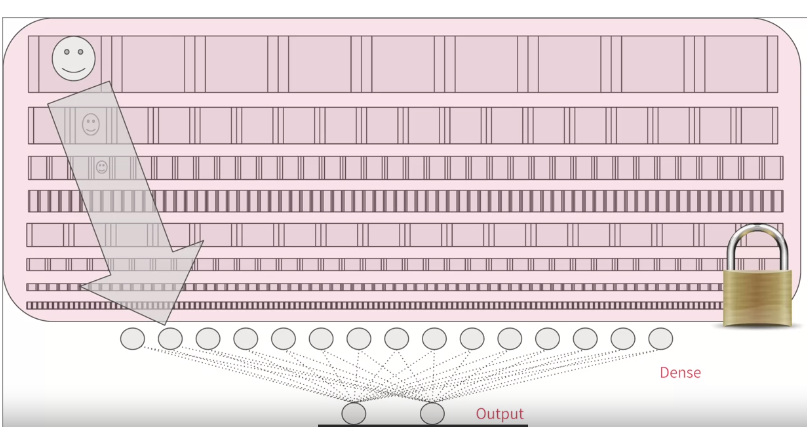

In [3]:
Image('transferLearning.PNG', width = 800)

#### Using Inception

Inception V3 has a fully-connected layer at the top, by setting include_top to False, specify that ignore fully-connected layer at the top and straight to the convolution

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150,150,3), 
                                include_top = False, # specify that ignore fully-connected layer at the top and straight to the convolution
                                weights = None) # you don't want to use the built-in weights but the snapshot you just download it

pre_trained_model.load_weights(local_weights_file)


#****************************************# 
# Iterate through Layers  to lock layers without changing parameters
#****************************************# 

for layer in pre_trained_model.layers:  
  layer.trainable = False # specify not to train within the local

pre_trained_model.summary() #huge code


All of layers have names. So you can look up the name of the last layer that you want to use.  

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7') 
last_output = last_layer.output # which is a output of a lot of convolution that are 7 by7

from tensorflow.keras.optimizers import RMSprop

# Same Model used in Course 1, but a different way to write it
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizers = RMSprop(lr = 0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

train_datagen = ImageDataGenerator(rescale = 1.0 / 255, 
                                   rotation_range = 40,
                                   height_shift_range = 0.2,
                                   width_shift_range = 0.2,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150,150)
)

history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_steps = 50,
    verbose = 2
)


### Dropout

Neural network can sometimes end up having similar weights and possible impact each other leading to over-fitting. By dropping out, Neighbors will not affecting each other too much and potentially removing overfitting



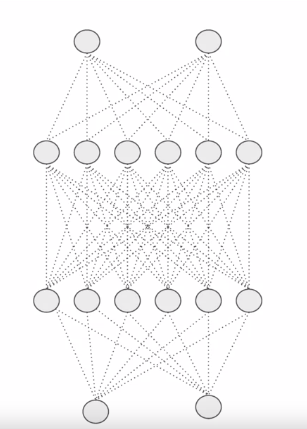

In [7]:
Image('dropout_org.PNG', width = 300)

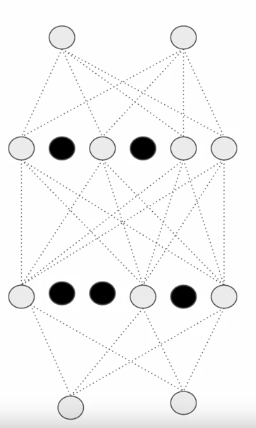

In [8]:
Image('dropout_new.PNG', width = 300)

### Add Dropout in Code

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x) # Parameter is between 0 and 1, it's fraction unit to drop
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizers = RMSprop(lr = 0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])